<a id='top'></a>

# Record Linkage of cpl and TransferMarkt Datasets
##### Notebook to join the scraped datasets from [CPL](https://canpl.ca/centre-circle-data/) provided by [StatsBomb](https://statsbomb.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/),  through [record-linkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players performance statistics and financial valuations.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 01/09/2020<br>
Notebook last updated: 04/07/2021

![title](../../img/logos/transfermarkt-logo-banner.png)

![title](../../img/logos/opta-cpl.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook joins datasets scraped from [cpl.com](https://cpl.com/en/) provided by [StatsBomb](https://statsbomb.com/) using a [Python webscraper](https://github.com/parth1902/Scrape-cpl-data) by [parth1902](https://github.com/parth1902), and [TransferMarkt](https://www.transfermarkt.co.uk/) using the [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://twitter.com/FC_rstats) through [RecordLinkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players statistics and financial valuations.scrapes data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) and the. This landed data is then manipulated as DataFrames using [pandas](http://pandas.pydata.org/).

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Teams](#section4.2)<br>
            1.    [Columns of Interest](#section4.2.1)<br>
            2.    [String Cleaning](#section4.2.2)<br>
            3.    [Converting Data Types](#section4.2.3)<br>
            4.    [Export the Engineered DataFrame](#section4.2.4)<br>
      3.    [Outfielder Players](#section4.3)<br>
            1.    [Columns of Interest](#section4.3.1)<br>
            2.    [String Cleaning](#section4.3.2)<br>
            3.    [Converting Data Types](#section4.3.3)<br>
            4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.    [Goalkeepers](#section4.4)<br>
            1.    [Columns of Interest](#section4.4.1)<br>
            2.    [String Cleaning](#section4.4.2)<br>
            3.    [Converting Data Types](#section4.4.3)<br>
            4.    [Export the Engineered DataFrame](#section4.4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Define Data Paths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_cpl = os.path.join(base_dir, 'data', 'cpl')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
data_dir_davies = os.path.join(base_dir, 'data', 'Davies')
data_dir_cpl_tm = os.path.join(base_dir, 'data', 'cpl-tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [5]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to fuzzy match scraped football data from [CPL](https://canpl.ca/centre-circle-data/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [RecordLinkage](https://pypi.org/project/recordlinkage/) and [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames.

The aims of this notebook is to result in two, finalised datasets of players and goalkeepers, exported to CSV. This data can be further analysis using python (see [Section 6](#section6) of this notebook), or can be explored using Tableau, PowerBI, Microsoft Excel. These datasets are the following:
*    outfield players
*    goalkeepers

The data used in this notebooks has been scraped using the [cpl](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/cpl.ipynb) and [TransferMarkt](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt.ipynb) webscraping notebooks.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections for the cpl and TransferMarkt datasets.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. CPL</a>

#### <a id='#section3.2.1'>3.2.1. Import Dataset</a>

In [7]:
# Import DataFrame as a CSV file
df_cpl = pd.read_csv(data_dir + '/centre-circle-opta-cpl/engineered/CPLPlayertotals_latest.csv')

#### <a id='#section3.2.2'>3.2.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [9]:
# Display the first 5 rows of the raw DataFrame, df_cpl
df_cpl.head()

,Rank,playerId,playerImageId,Player,playerFullName,pos,teamImageId,teamName,teamShortName,teamAbbrevName,teamId,optaPersonId,firstName,lastName,optaTeamId,leagueId,leagueName,Position,Team,GM,Min,Age,SubOn,SubOff,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,OFF,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,1v1,1v1InBox,Scs1v1InBox,SucflDuels,Success1v1,ThrghBalls,ThrghBlCmp,Touches,DuelLs,FailTackle,SucflTkls,Int,DefTouch,SucflTklPct,Clrnce,HeadClear,Recovery,FlComA3,FlComD3,FlComM3,FlSufA3,FlSufD3,FlSufM3,Offsides,CleanSheet,CrossPunch,ErrGoal,ErrShot,Cleared,KeeperCtch,GoalCncd,GoalCnIBx,GoalCnOBx,PensWon,Saves,SvBody,SvCght,SvClct,SvDive,SvFeet,SvFTip,SvHands,SvInBox,SvOutBox,SvPrdDng,SvPrdSaf,SvReach,SvStand,SvStoop,2ndYellow,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,PctPassFwd,PassSucPct,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttM3,PsAttD3,AerialSucPct,Aerials,ExpGAg,BgChncGoal,Crosses,DefTouchD3,DefTouchD3.1,DefTouchM3,DefTouchA3,OpenPlayxG,SetPiecexG,OpenPlayxG.1,SetPiecexG.1,NonPenxG,KeyPasses,DefBlocks,xGPerShot,ShotsTotal,CrossScsPct,CrossScsPctOpnPl,PctRegainsWithin6S,RecoveriesOppositionHalf,OpponentPossessionsStartingAndEndingInTheirOwnHalf,PassesIntoBox,ConcededPassesIntoBox,PassesIntoBox.1,ConcededPassesIntoBox.1,season
0,1,2sc081mofdwjhdhyggnz78b9,77881.0,L. Perea,Luis Alberto Perea,Centre Forward,15376,HFX Wanderers,Wanderers,HFX,5gmx3o5y2oc0i6rowjwtu7jvu,113755,Luis Alberto,Perea,15376,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Forward,HFX Wanderers,15,1014,35.0,3,6,2,11,7,4,2,1,4,0,3,2,2,0,0,3,0,1,0,0,1,0,3,5,9,63,12,302,82,145,3.42,3,1,0.87,5,1,1,11,12,15,1,0,41,9,0,0,441,58,4,6,2,13,58.80%,1,0,36,7,1,3,3,0,9,4,2,0,0,0,0,0,17,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,17,0,22,202,24,215,33,24.80%,75.20%,130,83,14,121,165,16,41.70%,24,0.0,3,4,3,3,5,5,1.72,1.71,1.72,1.71,1.85,11,0,0.19,18,0.25,0.25,31.10%,17,376,28,317,28,317,2019
1,1,1mg5xen2me6dsqu3b0lktvnbp,92004.0,M. Haber,Marcus Haber,Centre Forward,15380,Pacific,Pacific,PAC,b3436h8h14zw7f1uv6w9vqf6y,81402,Marcus,Haber,15380,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Forward,Pacific,13,703,32.0,7,1,1,6,6,0,0,0,13,0,13,1,1,0,0,3,0,0,2,8,4,0,1,0,7,59,13,177,38,67,4.19,3,0,1.36,6,1,1,8,9,1,0,0,75,0,0,0,264,53,0,2,1,10,66.70%,7,6,21,9,0,5,4,0,6,9,1,0,0,0,0,0,13,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,2,9,132,18,114,36,21.50%,59.30%,59,43,3,76,92,9,68.10%,94,0.0,1,5,7,7,1,2,3.07,1.12,3.07,1.12,3.41,9,1,0.22,19,0.2,0.2,32.40%,11,300,22,244,22,244,2019
2,1,7t6lyj5pvvgzfscj775acuqc5,233123.0,M. Bustos,Marco Bustos,Centre Attacking Midfielder,15378,Valour,Valour,VAL,dd2vf0yzjm7jm7cak9tf11sa2,173165,Marco,Bustos,15378,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Attacking Midfielder,Valour,25,2249,24.0,0,1,1,27,16,11,7,10,17,11,5,2,2,2,0,6,1,4,0,0,0,7,0,40,4,130,21,912,228,533,6.77,7,3,4.28,7,4,16,27,43,95,7,4,144,54,1,0,1417,155,3,19,12,37,44.90%,3,1,105,6,3,15,20,4,33,5,6,0,0,0,0,0,48,44,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,84,16,50,673,95,649,75,23.00%,83.40%,409,305,47,376,476,60,32.40%,34,0.0,3,74,17,17,15,5,4.53,2.24,4.53,2.24,5.19,40,0,0.11,61,0.24,0.18,33.40%,59,517,74,453,74,453,2019
3,1,b84lif9t7gwlw9ou9izawvumt,33727.0,D. Edgar,David Edward Edgar,Right Centre Back,15377,Forge,Forge,FOR,c2pdzdl3dgf5b0siidn2ay5ii,40345,David Edward,Edgar,15377,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Right Centre Back,Forge,11,834,33.0,2,0,0,2,2,0,0,0,4,1,1,0,0,1,0,1,0,1,1,1,1,0,0,2,2,57,24,501,284,136,0.99,1,0,0.00,1,0,0,0,0,1,0,0,29,1,0,0,594,16,6,6,8,56,75.00%,36,16,39,0,0,5,0,3,0,1,6,0,0,0,0,0,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,0,0,20,316,258,8,46.70%,83.80%,207,9,204,10,242,249,65.00%,20,0.0,1,2,48,48,8,0,0.66,0.33,0.66,0.33,0.99,0,5,0.17,6,0,0

In [10]:
# Display the last 5 rows of the raw DataFrame, df_cpl
df_cpl.tail()

,Rank,playerId,playerImageId,Player,playerFullName,pos,teamImageId,teamName,teamShortName,teamAbbrevName,teamId,optaPersonId,firstName,lastName,optaTeamId,leagueId,leagueName,Position,Team,GM,Min,Age,SubOn,SubOff,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,OFF,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,1v1,1v1InBox,Scs1v1InBox,SucflDuels,Success1v1,ThrghBalls,ThrghBlCmp,Touches,DuelLs,FailTackle,SucflTkls,Int,DefTouch,SucflTklPct,Clrnce,HeadClear,Recovery,FlComA3,FlComD3,FlComM3,FlSufA3,FlSufD3,FlSufM3,Offsides,CleanSheet,CrossPunch,ErrGoal,ErrShot,Cleared,KeeperCtch,GoalCncd,GoalCnIBx,GoalCnOBx,PensWon,Saves,SvBody,SvCght,SvClct,SvDive,SvFeet,SvFTip,SvHands,SvInBox,SvOutBox,SvPrdDng,SvPrdSaf,SvReach,SvStand,SvStoop,2ndYellow,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,PctPassFwd,PassSucPct,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttM3,PsAttD3,AerialSucPct,Aerials,ExpGAg,BgChncGoal,Crosses,DefTouchD3,DefTouchD3.1,DefTouchM3,DefTouchA3,OpenPlayxG,SetPiecexG,OpenPlayxG.1,SetPiecexG.1,NonPenxG,KeyPasses,DefBlocks,xGPerShot,ShotsTotal,CrossScsPct,CrossScsPctOpnPl,PctRegainsWithin6S,RecoveriesOppositionHalf,OpponentPossessionsStartingAndEndingInTheirOwnHalf,PassesIntoBox,ConcededPassesIntoBox,PassesIntoBox.1,ConcededPassesIntoBox.1,season
494,70,boaya7r30cknyt3xdvrhg7qad,NaN,A. Selemani,Ahinga Bienvenu Selemani,Centre Forward,15381,Cavalry,Cavalry,CAV,41ewt71n8fqwy6trsqta1bjvu,430299,Ahinga Bienvenu,Selemani,15381,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Forward,Cavalry,3,94,25.0,2,1,1,3,2,1,0,0,1,1,0,0,0,0,0,2,0,2,0,0,0,1,1,3,1,3,1,27,8,15,0.52,2,0,0.0,1,0,0,0,0,2,0,0,8,1,0,0,53,8,1,2,1,5,100.00%,1,0,4,1,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,27,2,24,7,11.10%,85.20%,13,10,0,12,15,0,50.00%,6,0.0,1,2,1,1,3,1,0.52,0.00,0.52,0.00,0.52,0,0,0.13,4,0,0,43.60%,4,56,1,37,1,37,2021
495,70,d2u788mhyqdacg7m8fwuiwve1,NaN,J. Wilson,Jordan Wilson,Defensive Midfielder,15382,York United,York,YRK,cqthcpums3aas2tdy0qhlkuwa,532451,Jordan,Wilson,15382,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Defensive Midfielder,York United,2,77,29.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,2,1,19,6,10,0.43,1,0,0.0,1,0,0,0,0,0,0,0,4,0,0,0,26,4,0,0,0,0,0.00%,0,0,1,0,0,2,0,1,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,9,13,1,36.80%,84.20%,8,1,7,1,11,7,100.00%,2,0.0,1,0,0,0,0,0,0.00,0.43,0.00,0.43,0.43,0,0,0.43,1,-,-,42.00%,1,42,1,32,1,32,2021
496,70,a6nj3s6nhav0ybrnhla1m67mc,NaN,M. Polisi,Marcello Polisi,Central Midfielder,15376,HFX Wanderers,Wanderers,HFX,5gmx3o5y2oc0i6rowjwtu7jvu,540262,Marcello,Polisi,15376,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Central Midfielder,HFX Wanderers,1,90,24.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,72,39,22,0.03,0,0,0.0,0,0,0,0,0,2,0,0,6,2,0,0,86,5,1,2,1,7,100.00%,2,0,5,0,1,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,28,56,0,27.80%,84.70%,43,1,17,1,51,20,0.00%,1,0.0,0,0,7,7,0,0,0.03,0.00,0.03,0.00,0.03,0,0,0.03,1,-,-,27.80%,0,34,0,18,0,18,2021
497,70,1emha184z70pj2va9qrwczrah,NaN,N. Hamilton,Nicholas Hamilton,NaN,15382,York United,York,YRK,cqthcpums3aas2tdy0qhlkuwa,505041,Nicholas,Hamilton,15382,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,York United,0,0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,0,0,0,-,0,0.0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,-,0,-,-,42.10%,0,24,0,16,0,16,2021
498,70,dfftu36k3j7hccz4u0yc65lka,NaN,K. Sow,Kareem Sow,Left Back,15376,HFX Wanderers,Wanderers,HFX,5gmx3o5y2oc0i6rowjwtu7jvu,427382,Kareem,Sow,15376,6lkj3o21cr4g7bql6tb3fk222,Ca

[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [11]:
# Print the shape of the raw DataFrame, df_cpl
print(df_cpl.shape)

(499, 156)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [12]:
# Features (column names) of the raw DataFrame, df_cpl
df_cpl.columns

Index(['Rank', 'playerId', 'playerImageId', 'Player', 'playerFullName', 'pos',
       'teamImageId', 'teamName', 'teamShortName', 'teamAbbrevName',
       ...
       'CrossScsPct', 'CrossScsPctOpnPl', 'PctRegainsWithin6S',
       'RecoveriesOppositionHalf',
       'OpponentPossessionsStartingAndEndingInTheirOwnHalf', 'PassesIntoBox',
       'ConcededPassesIntoBox', 'PassesIntoBox.1', 'ConcededPassesIntoBox.1',
       'season'],
      dtype='object', length=156)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [13]:
# Data types of the features of the raw DataFrame, df_cpl
df_cpl.dtypes

Rank                         int64
playerId                    object
playerImageId              float64
Player                      object
playerFullName              object
                            ...   
PassesIntoBox                int64
ConcededPassesIntoBox        int64
PassesIntoBox.1              int64
ConcededPassesIntoBox.1      int64
season                       int64
Length: 156, dtype: object

In [14]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_cpl.dtypes)

Rank                                                    int64
playerId                                               object
playerImageId                                         float64
Player                                                 object
playerFullName                                         object
pos                                                    object
teamImageId                                             int64
teamName                                               object
teamShortName                                          object
teamAbbrevName                                         object
teamId                                                 object
optaPersonId                                            int64
firstName                                              object
lastName                                               object
optaTeamId                                              int64
leagueId                                               object
leagueNa

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [15]:
# Info for the raw DataFrame, df_cpl
df_cpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 156 entries, Rank to season
dtypes: float64(10), int64(124), object(22)
memory usage: 608.3+ KB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [16]:
# Description of the raw DataFrame, df_cpl, showing some summary statistics for each numberical column in the DataFrame
df_cpl.describe()

,Rank,playerImageId,teamImageId,optaPersonId,optaTeamId,GM,Min,Age,SubOn,SubOff,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,OFF,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,1v1,1v1InBox,Scs1v1InBox,SucflDuels,Success1v1,ThrghBalls,ThrghBlCmp,Touches,DuelLs,FailTackle,SucflTkls,Int,DefTouch,Clrnce,HeadClear,Recovery,FlComA3,FlComD3,FlComM3,FlSufA3,FlSufD3,FlSufM3,Offsides,CleanSheet,CrossPunch,ErrGoal,ErrShot,Cleared,KeeperCtch,GoalCncd,GoalCnIBx,GoalCnOBx,PensWon,Saves,SvBody,SvCght,SvClct,SvDive,SvFeet,SvFTip,SvHands,SvInBox,SvOutBox,SvPrdDng,SvPrdSaf,SvReach,SvStand,SvStoop,2ndYellow,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttM3,PsAttD3,Aerials,ExpGAg,BgChncGoal,Crosses,DefTouchD3,DefTouchD3.1,DefTouchM3,DefTouchA3,OpenPlayxG,SetPiecexG,OpenPlayxG.1,SetPiecexG.1,NonPenxG,KeyPasses,DefBlocks,ShotsTotal,RecoveriesOppositionHalf,OpponentPossessionsStartingAndEndingInTheirOwnHalf,PassesIntoBox,ConcededPassesIntoBox,PassesIntoBox.1,ConcededPassesIntoBox.1,season
count,499.000000,423.000000,499.000000,499.000000,499.000000,499.000000,499.000000,498.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,15.631263,355215.387707,14374.290581,312378.647295,14374.290581,8.290581,574.080160,25.024096,1.897796,1.897796,0.210421,2.436874,1.669339,0.767535,0.863727,0.729459,2.735471,1.196393,0.905812,0.112224,0.086172,0.304609,0.028056,0.599198,0.108216,0.452906,0.108216,0.577154,0.318637,0.222445,0.370741,1.745491,2.517034,38.130261,14.162325,240.488978,105.543086,82.653307,0.802786,0.707415,0.448898,0.541042,1.054108,0.741483,1.090180,3.693387,4.791583,10.759519,0.899800,0.376754,31.751503,5.462926,0.254509,0.126253,353.985972,31.759519,3.671343,7.040080,6.428858,27.308617,9.414830,4.288577,30.823647,2.462926,1.719439,4.076152,1.607214,2.272545,3.915832,1.076152,1.785571,0.234469,0.064128,0.058116,0.130261,0.282565,8.008016,6.827655,1.180361,0.082164,1.699399,0.048096,0.094188,0.719439,0.795591,0.134269,0.008016,1.498998,1.042084,0.657315,0.280561,0.597194,0.084168,0.450902,0.344689,0.018036,0.028056,0.965932,11.547094,2.236473,6.541082,78.761523,121.54509,153.679359,10.927856,96.515030,28.745491,62.935872,38.354709,119.511022,82.623246,16.314629,0.690240,0.438878,9.228457,18.563126,18.563126,7.090180,1.655311,0.483888,0.318978,0.483888,0.318978,0.714289,4.344689,1.569138,6.765531,8.186373,215.440882,8.861723,158.272545,8.861723,158.272545,2019.959920
std,25.93

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

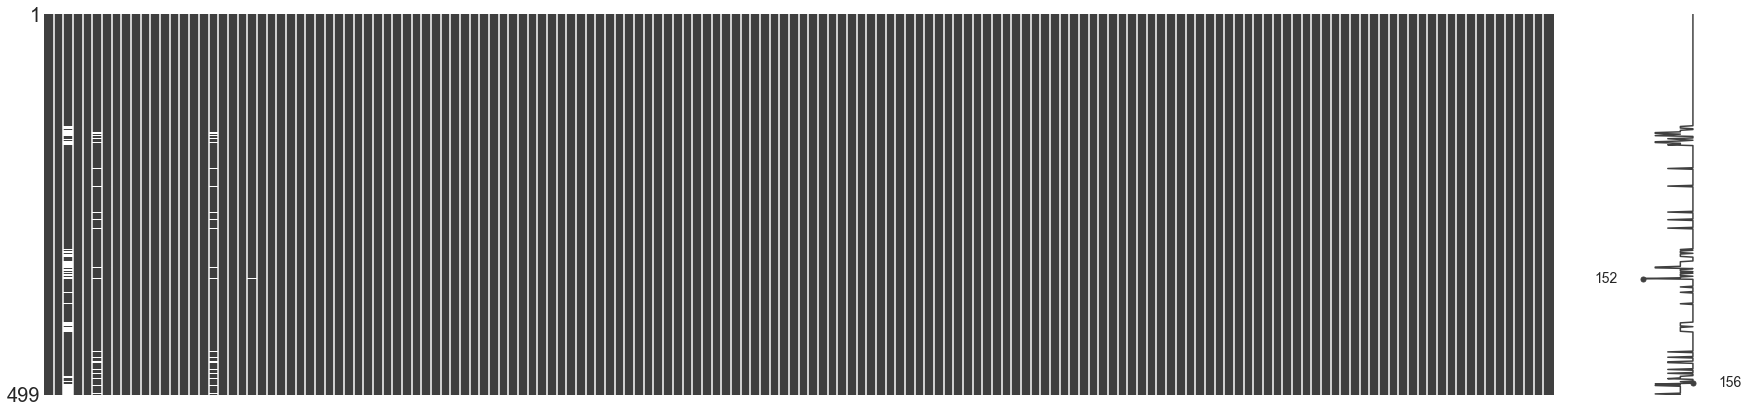

In [17]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_cpl
msno.matrix(df_cpl, figsize = (30, 7))

In [18]:
# Counts of missing values
null_value_stats = df_cpl.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

playerImageId    76
pos              26
Position         26
Age               1
dtype: int64

The visualisation shows us very quickly that there are no missing values in either of the datasets.

### <a id='#section3.3'>3.3. TransferMarkt</a>

#### <a id='#section3.3.1'>3.3.1. Import the Dataset</a>

In [20]:
# Import DataFrame as a CSV file
df_tm = pd.read_csv(data_dir + '/tm/engineered/2021_cpl/bio-status/tm_bio_status_2021_cpl_latest.csv')

#### <a id='#section3.3.2'>3.3.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [21]:
# Display the first 5 rows of the raw DataFrame, df_tm
df_tm.head()

,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,citizenship,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
0,187506,keven alemán,25.0,3.0,1994.0,San José,Costa Rica,1994-03-25,midfield - Attacking Midfield,170.0,left,NaN,Costa Rica,2021/2022,valour fc,canada,150000.0,2021-02-01,2021-11-30,NaN,NaN,NaN,NaN,FBM_SPORTS_AGENCY,keven aleman,keven,aleman,k,canada,CAM,Midfielder,Outfielder,27.0,26.0,0.0,0.0,135000.0
1,511222,austin ricci,8.0,4.0,1996.0,"Richmond Hill, Ontario",Canada,1996-04-08,attack - Centre-Forward,178.0,right,Canada,NaN,2021/2022,valour fc,canada,100000.0,2020-07-10,2021-11-30,NaN,NaN,NaN,NaN,Eikon,austin ricci,austin,ricci,a,canada,ST,Forward,Outfielder,25.0,24.0,0.0,0.0,90000.0
2,161607,stefan cebara,12.0,4.0,1991.0,Zadar,Jugoslawien (SFR),1991-04-12,midfield - Right Midfield,185.0,both,NaN,Croatia,2021/2022,valour fc,canada,150000.0,2020-04-03,2021-11-30,NaN,NaN,NaN,NaN,Peak Sports,stefan cebara,stefan,cebara,s,canada,RM,Midfielder,Outfielder,30.0,28.0,1.0,0.0,135000.0
3,101736,jose galán,2.0,2.0,1986.0,León,Spain,1986-02-02,midfield - Central Midfield,177.0,right,Spain,NaN,2021/2022,valour fc,canada,50000.0,2019-07-15,2021-11-30,NaN,NaN,NaN,NaN,no agent,jose galan,jose,galan,j,canada,CM,Midfielder,Outfielder,35.0,33.0,1.0,0.0,45000.0
4,35192,daryl fordyce,2.0,1.0,1987.0,Belfast,Northern Ireland,1987-01-02,midfield - Attacking Midfield,180.0,right,Northern Ireland,NaN,2021/2022,valour fc,canada,125000.0,2020-01-10,2021-11-30,NaN,NaN,NaN,NaN,NaN,daryl fordyce,daryl,fordyce,d,canada,CAM,Midfielder,Outfielder,34.0,33.0,1.0,0.0,112500.0


In [22]:
# Display the last 5 rows of the raw DataFrame, df_tm
df_tm.tail()

,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,citizenship,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
175,442553,sharly mabussi,27.0,5.0,1997.0,Kinshasa,DR Congo,1997-05-27,Defender - Left-Back,177.0,left,DR Congo,NaN,2021/2022,fc edmonton,canada,150000.0,2021-01-07,2021-11-30,NaN,NaN,NaN,NaN,Future Soccer,sharly mabussi,sharly,mabussi,s,canada,LB,Defender,Outfielder,24.0,23.0,0.0,0.0,135000.0
176,718096,tomas giraldo,8.0,3.0,2003.0,Medellin,Colombia,2003-03-08,midfield,184.0,NaN,NaN,Colombia,2021/2022,fc edmonton,canada,50000.0,2021-02-12,2021-12-31,NaN,club de foot montréal,united states,2021-11-30,Axia Sports Management,tomas giraldo,tomas,giraldo,t,canada,MF,Midfielder,Outfielder,18.0,17.0,0.0,0.0,45000.0
177,224094,ramón soria,7.0,3.0,1989.0,Alicante,Spain,1989-03-07,Defender - Centre-Back,182.0,left,Spain,NaN,2021/2022,fc edmonton,canada,125000.0,2019-01-31,2021-11-30,NaN,NaN,NaN,NaN,no agent,ramon soria,ramon,soria,r,canada,CB,Defender,Outfielder,32.0,29.0,2.0,0.0,112500.0
178,198388,fraser aird,2.0,2.0,1995.0,"Scarborough, Ontario",Canada,1995-02-02,midfield - Right Midfield,173.0,right,NaN,Scotland,2021/2022,fc edmonton,canada,250000.0,2020-12-24,2021-11-30,NaN,NaN,NaN,NaN,FSG USA,fraser aird,fraser,aird,f,canada,RM,Midfielder,Outfielder,26.0,25.0,0.0,0.0,225000.0
179,653326,marcus velado-tsegaye,1.0,7.0,2001.0,Edmonton,Canada,2001-07-01,attack - Left Winger,170.0,both,NaN,Canada,2021/2022,fc edmonton,canada,100000.0,2019-02-15,2021-11-30,NaN,NaN,NaN,NaN,NaN,marcus velado-tsegaye,marcus,velado-tsegaye,m,canada,LW,Forward,Outfielder,20.0,17.0,2.0,0.0,90000.0


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [23]:
# Print the shape of the raw DataFrame, df_tm
print(df_tm.shape)

(180, 37)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [24]:
# Features (column names) of the raw DataFrame, df_cpl
df_cpl.columns

Index(['Rank', 'playerId', 'playerImageId', 'Player', 'playerFullName', 'pos',
       'teamImageId', 'teamName', 'teamShortName', 'teamAbbrevName',
       ...
       'CrossScsPct', 'CrossScsPctOpnPl', 'PctRegainsWithin6S',
       'RecoveriesOppositionHalf',
       'OpponentPossessionsStartingAndEndingInTheirOwnHalf', 'PassesIntoBox',
       'ConcededPassesIntoBox', 'PassesIntoBox.1', 'ConcededPassesIntoBox.1',
       'season'],
      dtype='object', length=156)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [25]:
# Data types of the features of the raw DataFrame, df_tm
df_tm.dtypes

tm_id                            int64
player_name                     object
birth_day                      float64
birth_month                    float64
birth_year                     float64
pob                             object
cob                             object
dob                             object
position                        object
height                         float64
foot                            object
citizenship                     object
second_citizenship              object
season                          object
current_club                    object
current_club_country            object
market_value_euros             float64
joined                          object
contract_expires                object
contract_option                 object
on_loan_from                    object
on_loan_from_country            object
loan_contract_expiry            object
player_agent                    object
name_lower                      object
firstname_lower          

In [26]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tm.dtypes)

tm_id                            int64
player_name                     object
birth_day                      float64
birth_month                    float64
birth_year                     float64
pob                             object
cob                             object
dob                             object
position                        object
height                         float64
foot                            object
citizenship                     object
second_citizenship              object
season                          object
current_club                    object
current_club_country            object
market_value_euros             float64
joined                          object
contract_expires                object
contract_option                 object
on_loan_from                    object
on_loan_from_country            object
loan_contract_expiry            object
player_agent                    object
name_lower                      object
firstname_lower          

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [27]:
# Info for the raw DataFrame, df_tm
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tm_id                        180 non-null    int64  
 1   player_name                  180 non-null    object 
 2   birth_day                    178 non-null    float64
 3   birth_month                  178 non-null    float64
 4   birth_year                   178 non-null    float64
 5   pob                          167 non-null    object 
 6   cob                          180 non-null    object 
 7   dob                          178 non-null    object 
 8   position                     180 non-null    object 
 9   height                       161 non-null    float64
 10  foot                         85 non-null     object 
 11  citizenship                  92 non-null     object 
 12  second_citizenship           88 non-null     object 
 13  season              

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [28]:
# Description of the raw DataFrame, df_tm, showing some summary statistics for each numberical column in the DataFrame
df_tm.describe()

,tm_id,birth_day,birth_month,birth_year,height,market_value_euros,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
count,180.000000,178.000000,178.000000,178.000000,161.000000,172.000000,178.000000,171.000000,172.000000,171.000000,172.000000
mean,497899.066667,15.859551,5.606742,1996.376404,179.583851,126976.744186,24.247191,23.280702,0.720930,0.146199,114279.069767
std,228675.801444,9.227045,3.280202,3.866253,6.998713,94998.550527,3.893442,3.719999,0.832823,0.386120,85498.695474
min,8283.000000,1.000000,1.000000,1985.000000,162.000000,10000.000000,17.000000,16.000000,0.000000,-1.000000,9000.000000
25%,340319.000000,8.000000,3.000000,1994.000000,175.000000,75000.000000,21.000000,21.000000,0.000000,0.000000,67500.000000
50%,482621.500000,16.000000,5.000000,1996.500000,180.000000,125000.000000,24.000000,23.000000,0.000000,0.000000,112500.000000
75%,671146.000000,24.000000,8.000000,1999.000000,185.000000,150000.000000,26.000000,25.000000,1.000000,0.000000,135000.000000
max,903588.000000,31.000000,12.000000,2003.000000,198.000000,1000000.000000,36.000000,35.000000,2.000000,2.000000,900000.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

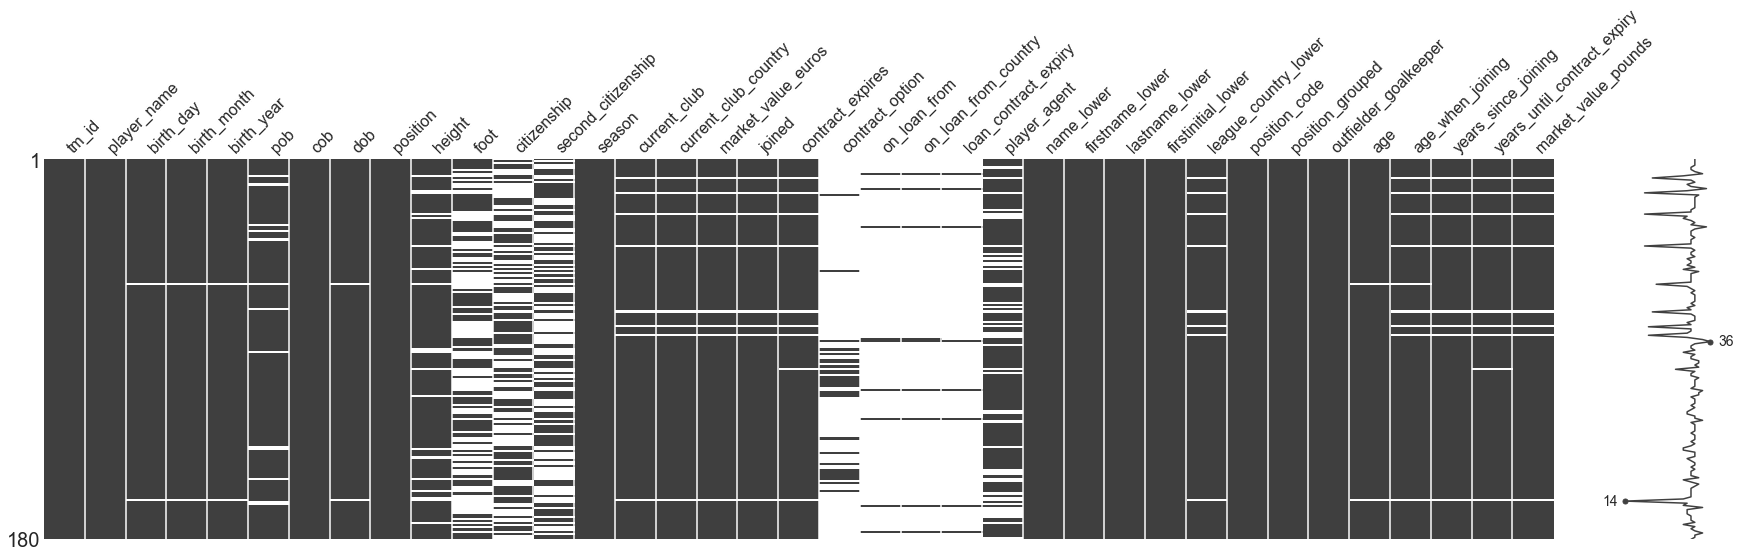

In [29]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm
msno.matrix(df_tm, figsize = (30, 7))

In [30]:
# Counts of missing values
null_value_stats = df_tm.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

birth_day                        2
birth_month                      2
birth_year                       2
pob                             13
dob                              2
height                          19
foot                            95
citizenship                     88
second_citizenship              92
current_club                     8
current_club_country             8
market_value_euros               8
joined                           8
contract_expires                 9
contract_option                152
on_loan_from                   171
on_loan_from_country           171
loan_contract_expiry           172
player_agent                    46
league_country_lower             8
age                              2
age_when_joining                 9
years_since_joining              8
years_until_contract_expiry      9
market_value_pounds              8
dtype: int64

The visualisation shows us very quickly that there very few missing values in either of the outfield or goalkeeper datasets, and therefore this data is ready to be joined to the [CPL](https://canpl.ca/centre-circle-data/) data.

## <a id='#section4'>4. Data Engineering</a>

### <a id='#section4.1'>4.1. CPL</a>

#### <a id='#section4.1.1'>4.1.1. String Cleaning</a>

In [36]:
df_cpl['name_lower'] = (df_cpl['playerFullName']
                            .str.normalize('NFKD')
                            .str.encode('ascii', errors='ignore')
                            .str.decode('utf-8')
                            .str.lower()
                       )

In [37]:
# First Name Lower
df_cpl['firstname_lower'] = df_cpl['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_cpl['lastname_lower'] = df_cpl['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_cpl['firstinitial_lower'] = df_cpl['name_lower'].astype(str).str[0]

#### <a id='#section4.1.2'>4.1.2. Create New Attributes</a>

##### Position Codes

In [40]:
df_cpl['pos'].unique()

array(['Centre Forward', 'Centre Attacking Midfielder',
       'Right Centre Back', 'Central Midfielder',
       'Right Attacking Midfielder', 'Goalkeeper', 'Left Centre Back',
       'Left Attacking Midfielder', 'Defensive Midfielder', 'Right Back',
       'Right Midfielder', 'Left Back', 'Left Midfielder', 'Left Winger',
       nan, 'Second Striker', 'Central Defender', 'Right Winger',
       'Left Wing Back'], dtype=object)

In [41]:
dict_positions_codes = {'Goalkeeper': 'GK',
                        'Central Defender': 'CB',
                        'Left Centre Back': 'LCB',
                        'Right Centre Back': 'RCB',
                        'Left Back': 'LB',
                        'Right Back': 'RB',     
                        'Defensive Midfielder': 'CDM',
                        'Central Midfielder': 'CM',
                        'Left Midfielder': 'LM',
                        'Right Midfielder': 'RM',
                        'Centre Attacking Midfielder': 'CAM',
                        'Left Attacking Midfielder': 'LAM',
                        'Right Attacking Midfielder': 'RAM',
                        'Left Winger': 'LW',
                        'Right Winger': 'RW',
                        'Second Striker': 'SS',
                        'Centre Forward': 'ST'                    
                       }

In [43]:
# Map grouped positions to DataFrame
df_cpl['position_code'] = df_cpl['pos'].map(dict_positions_codes)

##### Position Grouped

In [45]:
dict_positions_grouped = {'Goalkeeper': 'Goalkeeper',
                          'Central Defender': 'Defender',
                          'Left Centre Back': 'Defender',
                          'Right Centre Back': 'Defender',
                          'Left Back': 'Defender',
                          'Right Back': 'Defender',   
                          'Defensive Midfielder': 'Midfielder',
                          'Central Midfielder': 'Midfielder',
                          'Left Midfielder': 'Midfielder',
                          'Right Midfielder': 'Midfielder',
                          'Centre Attacking Midfielder': 'Midfielder',
                          'Left Attacking Midfielder': 'Midfielder',
                          'Right Attacking Midfielder': 'Midfielder',
                          'Left Winger': 'Forward',
                          'Right Winger': 'Forward',
                          'Second Striker': 'Forward',
                          'Centre Forward': 'Forward'               
                         }

In [46]:
# Map grouped positions to DataFrame
df_cpl['position_grouped'] = df_cpl['pos'].map(dict_positions_grouped)

##### Goalkeeper / Outfielder

In [47]:
# Separate Goalkeeper and Outfielders
df_cpl['outfielder_goalkeeper'] = np.where(df_cpl['pos'].isnull(), np.nan, (np.where(df_cpl['pos'] == 'Goalkeeper', 'Goalkeeper', 'Outfielder')))

#### <a id='#section4.1.3'>4.1.3. Select Columns of Interest</a>

In [48]:
df_cpl.head()

,Rank,playerId,playerImageId,Player,playerFullName,pos,teamImageId,teamName,teamShortName,teamAbbrevName,teamId,optaPersonId,firstName,lastName,optaTeamId,leagueId,leagueName,Position,Team,GM,Min,Age,SubOn,SubOff,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,OFF,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,1v1,1v1InBox,Scs1v1InBox,SucflDuels,Success1v1,ThrghBalls,ThrghBlCmp,Touches,DuelLs,FailTackle,SucflTkls,Int,DefTouch,SucflTklPct,Clrnce,HeadClear,Recovery,FlComA3,FlComD3,FlComM3,FlSufA3,FlSufD3,FlSufM3,Offsides,CleanSheet,CrossPunch,ErrGoal,ErrShot,Cleared,KeeperCtch,GoalCncd,GoalCnIBx,GoalCnOBx,PensWon,Saves,SvBody,SvCght,SvClct,SvDive,SvFeet,SvFTip,SvHands,SvInBox,SvOutBox,SvPrdDng,SvPrdSaf,SvReach,SvStand,SvStoop,2ndYellow,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,PctPassFwd,PassSucPct,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttM3,PsAttD3,AerialSucPct,Aerials,ExpGAg,BgChncGoal,Crosses,DefTouchD3,DefTouchD3.1,DefTouchM3,DefTouchA3,OpenPlayxG,SetPiecexG,OpenPlayxG.1,SetPiecexG.1,NonPenxG,KeyPasses,DefBlocks,xGPerShot,ShotsTotal,CrossScsPct,CrossScsPctOpnPl,PctRegainsWithin6S,RecoveriesOppositionHalf,OpponentPossessionsStartingAndEndingInTheirOwnHalf,PassesIntoBox,ConcededPassesIntoBox,PassesIntoBox.1,ConcededPassesIntoBox.1,season,name_lower,firstname_lower,lastname_lower,firstinitial_lower,position_code,position_grouped,outfielder_goalkeeper
0,1,2sc081mofdwjhdhyggnz78b9,77881.0,L. Perea,Luis Alberto Perea,Centre Forward,15376,HFX Wanderers,Wanderers,HFX,5gmx3o5y2oc0i6rowjwtu7jvu,113755,Luis Alberto,Perea,15376,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Forward,HFX Wanderers,15,1014,35.0,3,6,2,11,7,4,2,1,4,0,3,2,2,0,0,3,0,1,0,0,1,0,3,5,9,63,12,302,82,145,3.42,3,1,0.87,5,1,1,11,12,15,1,0,41,9,0,0,441,58,4,6,2,13,58.80%,1,0,36,7,1,3,3,0,9,4,2,0,0,0,0,0,17,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,17,0,22,202,24,215,33,24.80%,75.20%,130,83,14,121,165,16,41.70%,24,0.0,3,4,3,3,5,5,1.72,1.71,1.72,1.71,1.85,11,0,0.19,18,0.25,0.25,31.10%,17,376,28,317,28,317,2019,luis alberto perea,luis,perea,l,ST,Forward,Outfielder
1,1,1mg5xen2me6dsqu3b0lktvnbp,92004.0,M. Haber,Marcus Haber,Centre Forward,15380,Pacific,Pacific,PAC,b3436h8h14zw7f1uv6w9vqf6y,81402,Marcus,Haber,15380,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Forward,Pacific,13,703,32.0,7,1,1,6,6,0,0,0,13,0,13,1,1,0,0,3,0,0,2,8,4,0,1,0,7,59,13,177,38,67,4.19,3,0,1.36,6,1,1,8,9,1,0,0,75,0,0,0,264,53,0,2,1,10,66.70%,7,6,21,9,0,5,4,0,6,9,1,0,0,0,0,0,13,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,2,9,132,18,114,36,21.50%,59.30%,59,43,3,76,92,9,68.10%,94,0.0,1,5,7,7,1,2,3.07,1.12,3.07,1.12,3.41,9,1,0.22,19,0.2,0.2,32.40%,11,300,22,244,22,244,2019,marcus haber,marcus,haber,m,ST,Forward,Outfielder
2,1,7t6lyj5pvvgzfscj775acuqc5,233123.0,M. Bustos,Marco Bustos,Centre Attacking Midfielder,15378,Valour,Valour,VAL,dd2vf0yzjm7jm7cak9tf11sa2,173165,Marco,Bustos,15378,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Centre Attacking Midfielder,Valour,25,2249,24.0,0,1,1,27,16,11,7,10,17,11,5,2,2,2,0,6,1,4,0,0,0,7,0,40,4,130,21,912,228,533,6.77,7,3,4.28,7,4,16,27,43,95,7,4,144,54,1,0,1417,155,3,19,12,37,44.90%,3,1,105,6,3,15,20,4,33,5,6,0,0,0,0,0,48,44,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,84,16,50,673,95,649,75,23.00%,83.40%,409,305,47,376,476,60,32.40%,34,0.0,3,74,17,17,15,5,4.53,2.24,4.53,2.24,5.19,40,0,0.11,61,0.24,0.18,33.40%,59,517,74,453,74,453,2019,marco bustos,marco,bustos,m,CAM,Midfielder,Outfielder
3,1,b84lif9t7gwlw9ou9izawvumt,33727.0,D. Edgar,David Edward Edgar,Right Centre Back,15377,Forge,Forge,FOR,c2pdzdl3dgf5b0siidn2ay5ii,40345,David Edward,Edgar,15377,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),Right Centre Back,Forge,11,834,33.0,2,0,0,2,2,0,0,0,4,1,1,0,0,1,0,1,0,1,1,1,1,0,0,2,2,57,24,501

In [54]:
# Select columns of interest
cols_cpl = ['playerFullName',
            'name_lower',
            'firstname_lower',
            'lastname_lower',
            'firstinitial_lower',
           #'position_code',
           #'position_grouped',
           #'outfielder_goalkeeper'
           ]

# Create more concise DataFrame using only columns of interest
df_cpl_select = df_cpl[cols_cpl]

# Order rows by 'playerFullName
df_cpl_select = df_cpl_select.sort_values(by=['playerFullName'], ascending=[True])

# Drop duplicates
df_cpl_select = df_cpl_select.drop_duplicates()

# Display DataFrame
df_cpl_select.head()

,playerFullName,name_lower,firstname_lower,lastname_lower,firstinitial_lower
155,Abd-El-Aziz Yousef,abd-el-aziz yousef,abd-el-aziz,yousef,a
444,Abdoulaye Samake,abdoulaye samake,abdoulaye,samake,a
336,Aboubacar Sissoko,aboubacar sissoko,aboubacar,sissoko,a
119,Adam Mitter,adam mitter,adam,mitter,a
494,Ahinga Bienvenu Selemani,ahinga bienvenu selemani,ahinga,selemani,a


In [55]:
df_cpl_select

,playerFullName,name_lower,firstname_lower,lastname_lower,firstinitial_lower
155,Abd-El-Aziz Yousef,abd-el-aziz yousef,abd-el-aziz,yousef,a
444,Abdoulaye Samake,abdoulaye samake,abdoulaye,samake,a
336,Aboubacar Sissoko,aboubacar sissoko,aboubacar,sissoko,a
119,Adam Mitter,adam mitter,adam,mitter,a
494,Ahinga Bienvenu Selemani,ahinga bienvenu selemani,ahinga,selemani,a
...,...,...,...,...,...
241,Yong-Chan Son,yong-chan son,yong-chan,son,y
100,Zachary Sukunda,zachary sukunda,zachary,sukunda,z
377,Zachary Verhoven,zachary verhoven,zachary,verhoven,z
380,Álvaro Rivero Sánchez,alvaro rivero sanchez,alvaro,sanchez,a


## <a id='#section5'>5. Fuzzy Match Datasets - Record Linkage</a>

### <a id='#section5.1'>5.1. Introduction</a>
Now we have our two engineered DataFrames for [CPL](https://canpl.ca/centre-circle-data/) and [TransferMarkt](https://www.transfermarkt.co.uk/) data, we are now read to merge them to form one dataset.

We are required to join two data sets together that do not have a common unique identifier and are required to use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. 

<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html)

### <a id='#section5.2'>5.2. Join the CPL and TM Datasets using Record Linkage</a>

The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [58]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on=['firstinitial_lower'], 
              right_on=['firstinitial_lower']
             )

<Index>

The next step is to build up all the potential candidates to check:

In [68]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_cpl_select, df_tm)
print(len(candidates))

3945


Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [69]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')

features = compare.compute(candidates, df_cpl_select, df_tm)

View the potential candidates

In [70]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name
155 1          0.0        0.0
    5          0.0        0.0
    8          0.0        0.0
    18         0.0        0.0
    19         0.0        0.0
...            ...        ...
277 90         0.0        0.0
489 17         1.0        1.0
    90         1.0        0.0
100 29         0.0        0.0
377 29         0.0        1.0

[3945 rows x 2 columns]

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [71]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

2.0     137
1.0     328
0.0    3480
dtype: int64

To only include high-quality matches, let’s just take all the records with 3 matches out of 3 and create a total score column:

In [72]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 2].reset_index()
potential_matches

,level_0,level_1,first_name,last_name
0,494,127,1.0,1.0
1,402,150,1.0,1.0
2,120,48,1.0,1.0
3,219,145,1.0,1.0
4,400,140,1.0,1.0
...,...,...,...,...
132,428,116,1.0,1.0
133,205,36,1.0,1.0
134,284,56,1.0,1.0
135,476,118,1.0,1.0


In [73]:
potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'last_name'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,Score
0,494,127,1.0,1.0,2.0
1,402,150,1.0,1.0,2.0
2,120,48,1.0,1.0,2.0
3,219,145,1.0,1.0,2.0
4,400,140,1.0,1.0,2.0
...,...,...,...,...,...
132,428,116,1.0,1.0,2.0
133,205,36,1.0,1.0,2.0
134,284,56,1.0,1.0,2.0
135,476,118,1.0,1.0,2.0


In [75]:
# Join the cpl Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(potential_matches, df_cpl_select, left_on='level_0', right_index=True)

# Join the TransferMarkt Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm, left_on='level_1', right_index=True)

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [76]:
df_merge

,level_0,level_1,first_name,last_name,Score,playerFullName,name_lower_x,firstname_lower_x,lastname_lower_x,firstinitial_lower_x,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,citizenship,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower_y,firstname_lower_y,lastname_lower_y,firstinitial_lower_y,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
0,494,127,1.0,1.0,2.0,Ahinga Bienvenu Selemani,ahinga bienvenu selemani,ahinga,selemani,a,336171,ahinga selemani,15.0,3.0,1996.0,"Moncton, New Brunswick",Canada,1996-03-15,attack - Centre-Forward,175.0,left,NaN,Canada,2021/2022,cavalry fc,canada,200000.0,2021-01-01,2021-11-30,NaN,NaN,NaN,NaN,Eikon,ahinga selemani,ahinga,selemani,a,canada,ST,Forward,Outfielder,25.0,24.0,0.0,0.0,180000.0
1,402,150,1.0,1.0,2.0,Akeem Garcia,akeem garcia,akeem,garcia,a,354584,akeem garcía,11.0,9.0,1996.0,Chaguanas,Trinidad and Tobago,1996-09-11,attack - Centre-Forward,167.0,right,Trinidad and Tobago,NaN,2021/2022,hfx wanderers fc,canada,175000.0,2019-01-10,2022-11-30,club option 1 year,NaN,NaN,NaN,Eikon,akeem garcia,akeem,garcia,a,canada,ST,Forward,Outfielder,24.0,22.0,2.0,1.0,157500.0
2,120,48,1.0,1.0,2.0,Alessandro Hojabrpour,alessandro hojabrpour,alessandro,hojabrpour,a,528654,alessandro hojabrpour,1.0,10.0,2000.0,"Vancouver, British Columbia",Canada,2000-10-01,midfield - Defensive Midfield,181.0,NaN,NaN,Italy,2021/2022,pacific fc,canada,150000.0,2019-01-15,2021-11-30,NaN,NaN,NaN,NaN,Peak Sports,alessandro hojabrpour,alessandro,hojabrpour,a,canada,CDM,Midfielder,Outfielder,20.0,18.0,2.0,0.0,135000.0
3,219,145,1.0,1.0,2.0,Alessandro Riggi,alessandro riggi,alessandro,riggi,a,364677,alessandro riggi,30.0,11.0,1993.0,"Montréal, Quebec",Canada,1993-11-30,attack - Left Winger,162.0,NaN,NaN,Italy,2021/2022,hfx wanderers fc,canada,125000.0,2019-12-18,2021-11-30,NaN,NaN,NaN,NaN,NOVERA Sports,alessandro riggi,alessandro,riggi,a,canada,LW,Forward,Outfielder,27.0,26.0,1.0,0.0,112500.0
4,400,140,1.0,1.0,2.0,Alex Marshall,alex marshall,alex,marshall,a,513497,alex marshall,24.0,2.0,1998.0,Kingston,Jamaica,1998-02-24,attack - Left Winger,175.0,right,Jamaica,NaN,2021/2022,hfx wanderers fc,canada,100000.0,2020-01-29,2021-11-30,NaN,NaN,NaN,NaN,Hy Sports Agency,alex marshall,alex,marshall,a,canada,LW,Forward,Outfielder,23.0,21.0,1.0,0.0,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,428,116,1.0,1.0,2.0,Tyson Farago,tyson farago,tyson,farago,t,302427,tyson farago,1.0,5.0,1991.0,"Winnipeg, Manitoba",Canada,1991-05-01,Goalkeeper,186.0,NaN,Canada,NaN,2021/2022,cavalry fc,canada,100000.0,2021-01-21,2021-11-30,NaN,NaN,NaN,NaN,STAG Management,tyson farago,tyson,farago,t,canada,GK,Goalkeeper,Goalkeeper,30.0,29.0,0.0,0.0,90000.0
133,205,36,1.0,1.0,2.0,Vashon Neufville,vashon neufville,vashon,neufville,v,332338,vashon neufville,18.0,7.0,1999.0,London,England,1999-07-18,Defender - Left-Back,172.0,NaN,England,NaN,2021/2022,atlético ottawa,canada,100000.0,2020-03-24,2021-11-30,NaN,NaN,NaN,NaN,CAA Base Ltd,vashon neufville,vashon,neufville,v,canada,LB,Defender,Outfielder,21.0,20.0,1.0,0.0,90000.0
134,284,56,1.0,1.0,2.0,Victor Blasco,victor blasco,victor,blasco,v,367536,víctor blasco,1.0,7.0,1994.0,Barcelona,Spain,1994-07-01,attack - Left Winger,178.0,NaN,Spain,NaN,2021/2022,pacific fc,canada,175000.0,2019-02-07,2021-11-30,NaN,NaN,NaN,NaN,OPSMPRO,victor blasco,victor,blasco,v,canada,LW,Forward,Outfielder,27.0,24.0,2.0,0.0,157500.0
135,476,118,1.0,1.0,2.0,Victor Loturi,victor loturi,victor,loturi,v,670119,victor loturi,21.0,5.0,2001.0,"Calgary, Alberta",Canada,2001-05-21,midfield - Central Midfie

In [77]:
df_merge.shape

(137, 47)

In [79]:
# Select columns of interest
cols_merge = ['tm_id',
              'playerFullName',
              'player_name',
              'firstname_lower_y',
              'lastname_lower_y',
              'outfielder_goalkeeper',    # changed from 'outfielder_goalkeeper_y',
              'birth_day',
              'birth_month',
              'birth_year',
              'pob',
              'cob',
              'dob',
              'age',    # changed from 'age_x' and 'age_y',
              'age_when_joining',
              'years_since_joining',
              'years_until_contract_expiry',
              'position',    # changed from 'position_y',
              'position_code',
              'height',
              'foot',
              'second_citizenship',
              'season',
              'current_club',
              'current_club_country',
              'market_value_euros',
              'market_value_pounds',
              'joined',
              'contract_expires',
              'contract_option',
              'on_loan_from',
              'on_loan_from_country',
              'loan_contract_expiry',
              'player_agent',
              'season',
              'Score'
             ]

# Create more concise DataFrame using only columns of interest
df_merge_select = df_merge[cols_merge]

# Order rows by 'value' and matching 'Score' decending (i.e. best matches of 4 out of 4 at the top) 
df_merge_select = df_merge_select.sort_values(by=['market_value_pounds', 'player_name'], ascending=[False, True])

In [80]:
df_merge_select

,tm_id,playerFullName,player_name,firstname_lower_y,lastname_lower_y,outfielder_goalkeeper,birth_day,birth_month,birth_year,pob,cob,dob,age,age_when_joining,years_since_joining,years_until_contract_expiry,position,position_code,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,market_value_pounds,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season,Score
71,218451,Kyle Edward Bekker,kyle bekker,kyle,bekker,Outfielder,2.0,9.0,1990.0,"Oakville, Ontario",Canada,1990-09-02,30.0,28.0,2.0,0.0,midfield - Central Midfield,CM,178.0,right,Netherlands,2021/2022,forge fc,canada,300000.0,270000.0,2018-12-01,2021-11-30,NaN,NaN,NaN,NaN,Axia Sports Management,2021/2022,2.0
117,423445,Shamit Shome,shamit shome,shamit,shome,Outfielder,5.0,9.0,1997.0,"Edmonton, Alberta",Canada,1997-09-05,23.0,23.0,0.0,0.0,midfield - Central Midfield,CM,175.0,right,Bangladesh,2021/2022,fc edmonton,canada,300000.0,270000.0,2021-01-04,2021-11-30,NaN,NaN,NaN,NaN,Axia Sports Management,2021/2022,2.0
18,360248,Brett Levis,brett levis,brett,levis,Outfielder,29.0,3.0,1993.0,"Saskatoon, Saskatchewan",Canada,1993-03-29,28.0,26.0,1.0,0.0,Defender - Left-Back,LB,173.0,left,NaN,2021/2022,valour fc,canada,250000.0,225000.0,2020-01-30,2021-11-30,NaN,NaN,NaN,NaN,Topnotch Management,2021/2022,2.0
46,198388,Fraser Aird,fraser aird,fraser,aird,Outfielder,2.0,2.0,1995.0,"Scarborough, Ontario",Canada,1995-02-02,26.0,25.0,0.0,0.0,midfield - Right Midfield,RM,173.0,right,Scotland,2021/2022,fc edmonton,canada,250000.0,225000.0,2020-12-24,2021-11-30,NaN,NaN,NaN,NaN,FSG USA,2021/2022,2.0
67,677677,Karifa Yao,karifa yao,karifa,yao,Outfielder,28.0,9.0,2000.0,"Laval, Quebec",Canada,2000-09-28,20.0,20.0,0.0,0.0,Defender - Centre-Back,CB,188.0,NaN,NaN,2021/2022,cavalry fc,canada,250000.0,225000.0,2021-02-03,2021-12-31,NaN,club de foot montréal,united states,2021-11-30,SESPORTMANAGEMENT,2021/2022,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,856537,Marcello Polisi,marcello polisi,marcello,polisi,Outfielder,24.0,1.0,1997.0,NaN,Canada,1997-01-24,24.0,24.0,0.0,0.0,attack,FW,NaN,NaN,NaN,2021/2022,hfx wanderers fc,canada,10000.0,9000.0,2021-06-11,2021-11-30,NaN,NaN,NaN,NaN,First Deal Management,2021/2022,2.0
106,453697,Pierre Lamothe,pierre lamothe,pierre,lamothe,Outfielder,18.0,9.0,1997.0,"Greenfield Park, Quebec",Canada,1997-09-18,23.0,23.0,0.0,0.0,midfield,MF,173.0,NaN,NaN,2021/2022,hfx wanderers fc,canada,10000.0,9000.0,2021-01-27,2021-11-30,club option 1 year,NaN,NaN,NaN,OBELISQ,2021/2022,2.0
129,859181,Tony Mikhael,tony mikhael,tony,mikhael,Outfielder,1.0,3.0,2000.0,"Ottawa, Ontario",Canada,2000-03-01,21.0,20.0,0.0,0.0,Defender - Centre-Back,CB,NaN,NaN,Canada,2021/2022,valour fc,canada,10000.0,9000.0,2021-01-29,2021-11-30,NaN,NaN,NaN,NaN,Eikon,2021/2022,2.0
136,890819,William Akio,william akio,william,akio,Outfielder,23.0,7.0,1998.0,Nairobi,Kenya,1998-07-23,22.0,22.0,0.0,0.0,attack - Centre-Forward,ST,180.0,right,Southern Sudan,2021/2022,valour fc,canada,10000.0,9000.0,2021-05-05,2021-11-30,club option 1 year,NaN,NaN,NaN,Eikon,2021/2022,2.0


In [83]:
# Join the CPL Select DataFrame to the potential matches DataFrame
df_final = pd.merge(df_cpl_select, df_merge_select, how='left', left_on=['firstname_lower', 'lastname_lower'], right_on=['firstname_lower_y', 'lastname_lower_y'])

In [84]:
df_final.head()

,playerFullName_x,name_lower,firstname_lower,lastname_lower,firstinitial_lower,tm_id,playerFullName_y,player_name,firstname_lower_y,lastname_lower_y,outfielder_goalkeeper,birth_day,birth_month,birth_year,pob,cob,dob,age,age_when_joining,years_since_joining,years_until_contract_expiry,position,position_code,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,market_value_pounds,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,season,Score
0,Abd-El-Aziz Yousef,abd-el-aziz yousef,abd-el-aziz,yousef,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdoulaye Samake,abdoulaye samake,abdoulaye,samake,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aboubacar Sissoko,aboubacar sissoko,aboubacar,sissoko,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adam Mitter,adam mitter,adam,mitter,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahinga Bienvenu Selemani,ahinga bienvenu selemani,ahinga,selemani,a,336171.0,Ahinga Bienvenu Selemani,ahinga selemani,ahinga,selemani,Outfielder,15.0,3.0,1996.0,"Moncton, New Brunswick",Canada,1996-03-15,25.0,24.0,0.0,0.0,attack - Centre-Forward,ST,175.0,left,Canada,2021/2022,cavalry fc,canada,200000.0,180000.0,2021-01-01,2021-11-30,NaN,NaN,NaN,NaN,Eikon,2021/2022,2.0


In [ ]:
breakit = here
# from here on not finished

In [ ]:
# Select columns of interest
cols_final = ['tm_id',
              'Season',
              ]


# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['market_value_pounds', 'player'], ascending=[False, True])

In [ ]:
df_final.head()

In [ ]:
# Rename columns
df_final = df_final.rename(columns={'age_x': 'age',
                                    'age_y': 'age_tm',
                                    'outfielder_goalkeeper_y': 'outfielder_goalkeeper',
                                    'position': 'position_cpl',
                                    'position_y': 'position_TM',
                                    'squad': 'club',
                                    'nationality_cleaned': 'nationality',
                                   }
                          )

In [ ]:
df_final.shape

In [ ]:
df_final_dedupe = df_final.drop_duplicates()

In [ ]:
df_final_dedupe.shape

In [ ]:
df_final_dedupe

In [ ]:
df_final[df_final['player'] == 'Raheem Sterling']

In [ ]:
df_null = df_final_dedupe[df_final_dedupe['market_value_euros'].isnull()]

In [ ]:
df_null

In [ ]:
#df_null.to_csv(data_dir + '/test_null_tm_cpl.csv', index=None, header=True)

### <a id='#section5.3'>5.3. Export Dataset 

In [ ]:
# Export DataFrame as a CSV file

## Export a copy to the 'archive' subfolder of the TM folder, including the date
df_final_davies_dedupe.to_csv(data_dir + f'/cpl-tm/archive/cpl_tm_big5_combined_last_updated_{today}.csv', index=None, header=True)

## Export another copy to the TM folder called 'latest' (can be overwritten)
df_final_davies_dedupe.to_csv(data_dir + '/cpl-tm/cpl_tm_big5_combined_latest.csv', index=None, header=True)

## Export another copy to the TM folder called 'latest' (can be overwritten)
df_final_davies_dedupe.to_csv(data_dir + '/export/cpl_tm_big5_combined_latest.csv', index=None, header=True)

## <a id='#section5'>5. Exploratory Data Analysis</a>

In [ ]:
df_final_davies_dedupe.head()

In [ ]:
df_final_davies_dedupe[df_final_davies_dedupe['player'] == 'Raheem Sterling']

## <a id='#section6'>6. Summary</a>
This notebook matches the scraped datasets from [CPL](https://canpl.ca/centre-circle-data/) provided by [StatsBomb](https://statsbomb.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/),  through [record-linkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players performance statistics and financial valuations.

With this notebook we now have aggregated player performance data for players in the 'Big 5' European leagues for the 17/18-present seasons, along with their corresponding TransferMarkt valuations and contractual information.

## <a id='#section7'>7. Next Steps</a>
This data is now ready to be exported and analysed in further Jupyter notebooks or Tableau.

The Data Engineering subfolder in GitHub can be found [here](https://github.com/eddwebster/football_analytics/tree/master/notebooks/B\)%20Data%20Engineering) and a static version of the record linkage notebook in which the cpl data is joined to TransferMarkt data can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/B%29%20Data%20Engineering/Record%20Linkage%20of%20cpl%20and%20TransferMarkt%20Datasets.ipynb).

## <a id='#section8'>8. References</a>

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)